In [20]:
# Import the necessary lib.
# Load the data into DF
# Identify the X (feature) and Y (outcome/response) variables in the DF 
# Splitting the data into training and validation data
# Model fitting
# Model Diagnostics ###
# Model Performance

In [21]:
import pandas as pd 
import numpy as np

In [22]:
data = pd.read_csv('HomeProducts_raw_data.csv')
df = pd.DataFrame(data = data)

In [23]:
# Statsmodel is a library that has a host of statistical learning models. 
# OLS() model : resides in the Statsmodel
import statsmodels.api as sm

In [24]:
# To estimate regr coeff (B0), a constant term of 1 needs to be added as a separate column. This value 
# temp. remains the same for all rows. Eventually, this will help the model arrive at B0(intercept)

X = sm.add_constant(df['Advertisement'].values)
y = df['Sales'].values

In [25]:
# X

In [26]:
# Fitting the Model using OLS method; pass y and X as parameters
# OLS is Ordinary Least Squares

model = sm.OLS(y, X).fit()

# The fit() method on OLS estimates the reg coeff. and returns the model information to the 'model' 
# variable. The model information contains the reg coeff., accuracy measures and residual values. 

In [27]:
# Getting the reg coefficients

print(model.params)

# constant, slope

[61.55535534  3.07617744]


In [28]:
# Information required for Diagnostics

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     8.893
Date:                Sun, 24 Jul 2022   Prob (F-statistic):            0.00449
Time:                        16:43:43   Log-Likelihood:                -283.20
No. Observations:                  50   AIC:                             570.4
Df Residuals:                      48   BIC:                             574.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.5554     66.702      0.923      0.361     -72.558     195.669
x1             3.0762      1.032      2.982      0.004       1.002       5.150
==============================================================================
Omnibus:                        1.393   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.291
Skew:                           0.256   Prob(JB):                        0.524
Kurtosis:                       2.403   Cond. No.                         428.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Prediction of X values (Y-hat: fitted values)
# predict() method takes in new values of X as a parameter and returns values of Y

pred_y = model.predict(X)
pred_y
# pred_y

array([252.27835649, 296.35997918, 283.04013087, 246.12600162,
       249.20217906, 230.74511443, 276.887776  , 270.73542112,
       316.2628472 , 243.04982418, 239.97364674, 246.12600162,
       264.58306625, 316.87808269, 270.73542112, 176.3890591 ,
       304.57337294, 271.9658921 , 276.887776  , 243.04982418,
       255.35453393, 215.36422724, 273.81159856, 221.51658211,
       212.2880498 , 260.27641783, 215.36422724, 289.19248575,
       239.97364674, 267.65924368, 292.26866319, 246.12600162,
       230.74511443, 301.4971955 , 215.61032143, 233.82129187,
       270.73542112, 221.51658211, 227.66893699, 221.51658211,
       295.34484062, 260.89165332, 290.42295672, 290.73057447,
       287.65439703, 238.68165222, 270.73542112, 273.81159856,
       264.58306625, 248.58694357])

#### Import Performance metrics - R squared and MSE

In [30]:
# Measure the accuracy of our predictions: r2_score: R-squared
# MSE : Mean Squared Error

from sklearn.metrics import r2_score, mean_squared_error

r2_score(y, pred_y)

0.15631530754337575

In [31]:
# The model only explains 15.6% of the variance in Y. 

In [32]:
# MSE (mean of the square of the difference between y and pred_y)

mse = mean_squared_error(y, pred_y)
mse

4866.041177799037

In [33]:
# RMSE: root mean squared error

np.sqrt(mse)

69.75701525867514

In [34]:
# RMSE means the average error the model makes in predicting the outomce. The smaller the value of 
# RMSE, the better the model is. 

# With train test split

In [35]:
data = pd.read_csv('HomeProducts_raw_data.csv')
df = pd.DataFrame(data = data)
df.head(4)

,S.I,Advertisement,Sales
0,1,62.00,270.0
1,2,76.33,200.0
2,3,72.00,240.0
3,4,60.00,250.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S.I            50 non-null     int64  
 1   Advertisement  50 non-null     float64
 2   Sales          50 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


In [37]:
X = sm.add_constant(df['Advertisement'].values)

In [38]:
 #X

In [39]:
y = df['Sales'].values

In [40]:
# y

#### Import from Sklearn, train test split

In [41]:
# train_test_split() function from sklearn.model_selection module provides the ability to split
# the dataset randomly into training and validation datasets

from sklearn.model_selection import train_test_split

In [42]:
# training data > model learning (fit)
# testing data > model evaluation/perf.metrics

# Source: X and y data

# training data > X and y > train_X and train_y [ model will learn from this..]
# train_X, train_y are subsets of X and y respectively.

# testing data > X and y > test_X and test_y [model will predict using test_X and perf. evaluation
# will happen against test_y]

# random_state is just a seed value for repeatability of results. 

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 101) 

In [43]:
# model learns from training data alone
# OLS method takes in training y and training X data as parameters

model = sm.OLS(train_y, train_X).fit()

In [44]:
# params gives you B0 and B1
model.params

array([26.21637012,  3.64022056])

In [45]:
# summary gives a list of statistical information
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     8.925
Date:                Sun, 24 Jul 2022   Prob (F-statistic):            0.00491
Time:                        16:43:56   Log-Likelihood:                -228.52
No. Observations:                  40   AIC:                             461.0
Df Residuals:                      38   BIC:                             464.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.2164     79.018      0.332      0.742    -133.747     186.180
x1             3.6402      1.219      2.987      0.005       1.173       6.107
==============================================================================
Omnibus:                        2.389   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.681
Skew:                           0.296   Prob(JB):                        0.432
Kurtosis:                       2.189   Cond. No.                         431.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Making prediction using test_X data

pred_y = model.predict(test_X) 
pred_y

array([215.50783911, 273.75136802, 208.22739799, 226.42850078,
       277.39158858, 304.07440527, 208.22739799, 273.75136802,
       297.04877959, 277.39158858])

#### Import Performance metrics - R squared and MSE

In [47]:
# Evaluate the model using performance metrics from sklearn

from sklearn.metrics import r2_score, mean_squared_error

In [48]:
r2_score(test_y, pred_y)

-0.3168890782271627

In [49]:
# RMSE 

np.sqrt(mean_squared_error(test_y, pred_y))

54.9492124977453

### Predicting a single observation

In [50]:
X_new = [1, 60]

pred_y_new = model.predict(X_new) 

In [51]:
pred_y_new

array([244.62960356])

### Prediction Intervals

In [52]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [53]:
_, pred_y_low, pred_y_high = wls_prediction_std(model, X_new, alpha = 0.05)

In [54]:
pred_y_low, pred_y_high

(array([90.25770469]), array([399.00150244]))

### Normal P-P Plot

In [55]:
import matplotlib.pyplot as plt

In [56]:
sales_residuals = model.resid
sales_residuals

array([ -61.79379415,  -84.58717743,  -38.75136802,  -55.82026982,
        -50.03180914,    5.37039644,   97.89733776,  -49.23291193,
         77.89419647, -135.55026524,  -47.41280165,   42.21171978,
         66.22741891,  -15.50783911,   12.65083755,   52.45821999,
        -11.37461813,   19.8464264 ,  -96.15136802,  -48.31225025,
        -77.59269137,   56.48138437,  109.93127867,   97.37336773,
        -16.98938301, -120.11114747,  161.52907309,   73.57149922,
         18.08995532,  122.65083755,  -68.26982412,   90.12686752,
        121.64532362,   -0.98938301,  -26.47092691,  -95.50783911,
        -21.03180914,    4.79254375,  -64.62960356,  -44.62960356])

/home/jack/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x1152 with 0 Axes>

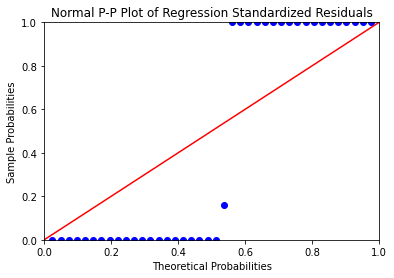

In [59]:
probplot = sm.ProbPlot(sales_residuals)
plt.figure(figsize = (8, 16))
probplot.ppplot(line='45',xlabel=None,ylabel=None,marker='o')
plt.title('Normal P-P Plot of Regression Standardized Residuals')
plt.show()

### Test for Constant Variance

In [155]:
def standardize(vals):
    return (vals - vals.mean())/vals.std()

Text(0, 0.5, 'Standardized Residuals')

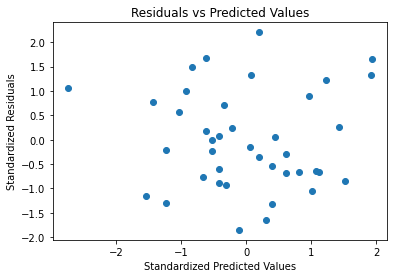

In [156]:
plt.scatter(standardize(model.fittedvalues), standardize(sales_residuals))
plt.title('Residuals vs Predicted Values')
plt.xlabel('Standardized Predicted Values')
plt.ylabel('Standardized Residuals')

### Outlier Analysis

#### Z score

In [157]:
from scipy.stats import zscore

In [158]:
df['Z_score_sales'] = zscore(df['Sales'])

In [159]:
df.head()

,S.I,Advertisement,Sales,Z_score_sales
0,1,62.00,270.0,0.155481
1,2,76.33,200.0,-0.766241
2,3,72.00,240.0,-0.239543
3,4,60.00,250.0,-0.107868
4,5,61.00,180.0,-1.029590


In [160]:
df[(df['Z_score_sales'] > 3.0) | (df['Z_score_sales'] < -3.0)]

,S.I,Advertisement,Sales,Z_score_sales


### Cook's Distance

Text(0, 0.5, 'Cooks Distance')

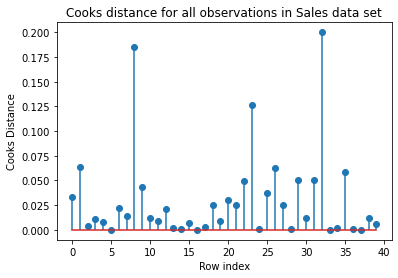

In [180]:
sales_influence = model.get_influence()

(c, p) = sales_influence.cooks_distance

# c is cook's distance, p is corresponding p-values

plt.stem(np.arange(len(c)), np.round(c,3), markerfmt='C0o')

plt.title('Cooks distance for all observations in Sales data set')

plt.xlabel('Row index')

plt.ylabel('Cooks Distance')

# look for > 1

### Leverage Plots

In [181]:
from statsmodels.graphics.regressionplots import influence_plot

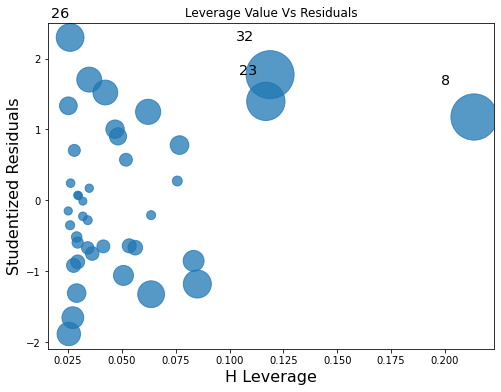

In [182]:
fig, ax = plt.subplots(figsize=(8,6))
influence_plot(model, ax = ax )
plt.title('Leverage Value Vs Residuals')
plt.show()

In [184]:
from statsmodels.stats.outliers_influence import OLSInfluence as olsi

In statistics, a studentized residual is the quotient resulting from the division of a residual by 
an estimate of its standard deviation. 
It is a form of a Student's t-statistic, with the estimate of error varying between points.

In [185]:
studentized_residuals = olsi(model).resid_studentized

hat matrix, also known as the influence matrix, since it describes the
influence of each observation on the predicted values of the response variable. 
Hat matrix plays a crucial
role in identifying the outliers and influential observations in the sample.


In [186]:
leverage_pts = olsi(model).hat_matrix_diag[]

In [187]:
high_resid = [i for i in studentized_residuals if abs(i) > 3] 

In [188]:
high_resid

[]

In [189]:
leverage_pts

array([0.08328084, 0.08501176, 0.02897811, 0.03620766, 0.03411988,
       0.02943969, 0.02512524, 0.05617436, 0.21351021, 0.02532372,
       0.05337748, 0.05186598, 0.04817801, 0.06354714, 0.03481225,
       0.02787947, 0.02506318, 0.07571565, 0.02897811, 0.04136452,
       0.05071203, 0.07673944, 0.04228768, 0.11682312, 0.03186311,
       0.0271958 , 0.0259392 , 0.04681397, 0.02616999, 0.03481225,
       0.02754198, 0.0621624 , 0.11879879, 0.03186311, 0.0259392 ,
       0.06354714, 0.03411988, 0.02983824, 0.02943969, 0.02943969])

In [190]:
high_lev = [i for i in leverage_pts if abs(i) > (3/len(X))] 

In [196]:
high_lev

[0.08328084078833486,
 0.08501176323129325,
 0.2135102053146799,
 0.06354714207589304,
 0.07571564513616164,
 0.07673943647522491,
 0.1168231211473163,
 0.06216240412152638,
 0.11879879102939972,
 0.06354714207589304]

In [200]:
pos = [np.where(leverage_pts == x)[0][0] for x in high_lev]

In [193]:
pos

[0, 1, 8, 13, 17, 21, 23, 31, 32, 13]

In [201]:
for n in pos:
    print(df.iloc[n])

S.I                1.0
Advertisement     62.0
Sales            270.0
Name: 0, dtype: float64
S.I                2.00
Advertisement     76.33
Sales            200.00
Name: 1, dtype: float64
S.I                9.0
Advertisement     82.8
Sales            425.0
Name: 8, dtype: float64
S.I               14.0
Advertisement     83.0
Sales            450.0
Name: 13, dtype: float64
S.I               18.0
Advertisement     68.4
Sales            280.0
Name: 17, dtype: float64
S.I               22.0
Advertisement     50.0
Sales            260.0
Name: 21, dtype: float64
S.I               24.0
Advertisement     52.0
Sales            120.0
Name: 23, dtype: float64
S.I               32.0
Advertisement     60.0
Sales            200.0
Name: 31, dtype: float64
S.I               33.0
Advertisement     55.0
Sales            300.0
Name: 32, dtype: float64
S.I               14.0
Advertisement     83.0
Sales            450.0
Name: 13, dtype: float64


In [ ]:
import mat